In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("global_pp_database.csv")
df=pd.DataFrame(data)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EDA PROCESS

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
list=['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2','other_fuel3', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'year_of_capacity_data','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source','estimated_generation_gwh']
for i in list:
    vc=df[i].value_counts()
    print(vc)

IND    908
Name: country, dtype: int64
India    908
Name: country_long, dtype: int64
RATNAGIRI GAS               1
YASHWANTRAO MOHITE          1
GANGUWAL                    1
KOTLA                       1
B. BRIDGE D.G               1
                           ..
KOVILKALAPPAL               1
TALCHER STPS                1
Powerica Kutch Wind Farm    1
KISHENGANGA                 1
MSPL Wind Farm              1
Name: name, Length: 908, dtype: int64
WRI1019935    1
IND0000098    1
IND0000174    1
IND0000143    1
IND0000023    1
             ..
IND0000034    1
IND0000464    1
IND0000142    1
IND0000002    1
IND0000028    1
Name: gppd_idnr, Length: 908, dtype: int64
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 365, dtype: int64
24.1917    3
19.0004    3
10.3118    2
15.1839    2
14.2133    2
          ..
23.9784    1
24.5216    1
17.5010    1
20.9099    1
16.3125   

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [7]:
df["latitude"]=df["latitude"].replace(np.NaN,24.1917)
df["longitude"]=df["longitude"].replace(np.NaN,71.6917)

In [8]:
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=5)
df["generation_gwh_2013"]=imp.fit_transform(df["generation_gwh_2013"].values.reshape(-1,1))

In [9]:
df["generation_gwh_2014"]=imp.fit_transform(df["generation_gwh_2014"].values.reshape(-1,1))
df["generation_gwh_2015"]=imp.fit_transform(df["generation_gwh_2015"].values.reshape(-1,1))
df["generation_gwh_2016"]=imp.fit_transform(df["generation_gwh_2016"].values.reshape(-1,1))
df["generation_gwh_2017"]=imp.fit_transform(df["generation_gwh_2017"].values.reshape(-1,1))

In [10]:
df["commissioning_year"]=df["commissioning_year"].replace(np.NAN,2013)

In [11]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [12]:
df.drop(["country","country_long","name","gppd_idnr","other_fuel2","other_fuel3","geolocation_source","wepp_id","year_of_capacity_data","generation_data_source","estimated_generation_gwh","url",'other_fuel1'],axis=1,inplace=True)

In [13]:
df['powerplant_age'] = 2018 - df['commissioning_year']

In [14]:
df.drop("commissioning_year",axis=1,inplace=True)

In [19]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
owner                   object
source                  object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
powerplant_age         float64
dtype: object

ENCODING OBJECTIVE COLUMNS

In [20]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'owner',
       'source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'powerplant_age'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['primary_fuel','owner', 'source']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))
df

,capacity_mw,latitude,longitude,primary_fuel,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,powerplant_age
0,2.5,28.1839,73.2407,6,229,109,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7.0
1,98.0,24.7663,74.6090,1,258,174,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0
2,39.2,21.9038,69.3732,7,2,21,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0
3,135.0,23.8712,91.3602,2,280,22,631.777928,617.789264,843.747000,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,1,280,22,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,280,22,2304.059202,2420.393316,0.994875,233.596650,865.400000,2.0
904,3.0,12.8932,78.1654,6,114,77,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0
905,25.5,15.2758,75.5811,7,280,21,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0
906,80.0,24.3500,73.7477,1,91,59,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0


In [22]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
owner                    int32
source                   int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
powerplant_age         float64
dtype: object

In [23]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
owner                  0
source                 0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
powerplant_age         0
dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

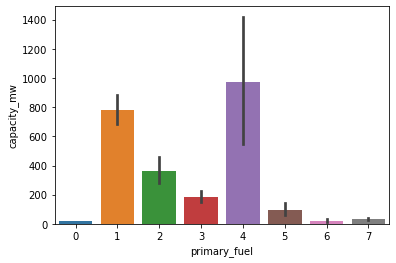

In [26]:
sns.barplot(x="primary_fuel",y="capacity_mw",data=df)

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>],
       [<AxesSubplot:title={'center':'owner'}>,
        <AxesSubplot:title={'center':'source'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'powerplant_age'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

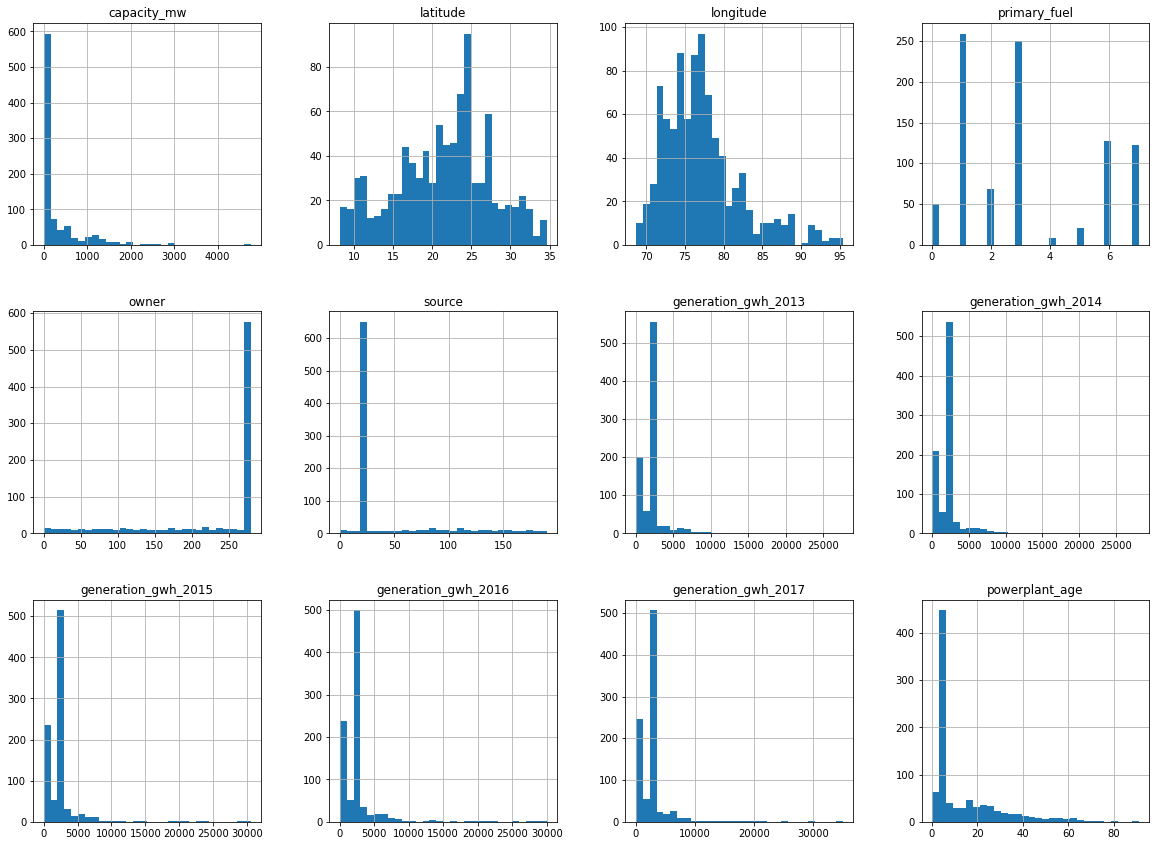

In [25]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [19]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,powerplant_age
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.347944,77.156237,3.205947,227.534141,43.823789,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,14.375551
std,580.221767,6.123489,4.945215,2.281339,83.895877,44.624092,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,15.238021
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,73.812975,1.000000,188.750000,22.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887,5.000000
50%,60.000000,22.137800,76.492900,3.000000,280.000000,22.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.000000
75%,388.125000,25.183775,79.211600,6.000000,280.000000,29.250000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.000000
max,4760.000000,34.649000,95.408000,7.000000,280.000000,190.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,91.000000


In [20]:
df.skew()

capacity_mw            3.193257
latitude              -0.213428
longitude              1.118449
primary_fuel           0.471141
owner                 -1.375607
source                 1.829145
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
powerplant_age         1.779021
dtype: float64

capacity_mw               AxesSubplot(0.125,0.749828;0.133621x0.130172)
latitude               AxesSubplot(0.285345,0.749828;0.133621x0.130172)
longitude               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
primary_fuel           AxesSubplot(0.606034,0.749828;0.133621x0.130172)
owner                  AxesSubplot(0.766379,0.749828;0.133621x0.130172)
source                    AxesSubplot(0.125,0.593621;0.133621x0.130172)
generation_gwh_2013    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
generation_gwh_2014     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
generation_gwh_2015    AxesSubplot(0.606034,0.593621;0.133621x0.130172)
generation_gwh_2016    AxesSubplot(0.766379,0.593621;0.133621x0.130172)
generation_gwh_2017       AxesSubplot(0.125,0.437414;0.133621x0.130172)
powerplant_age         AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

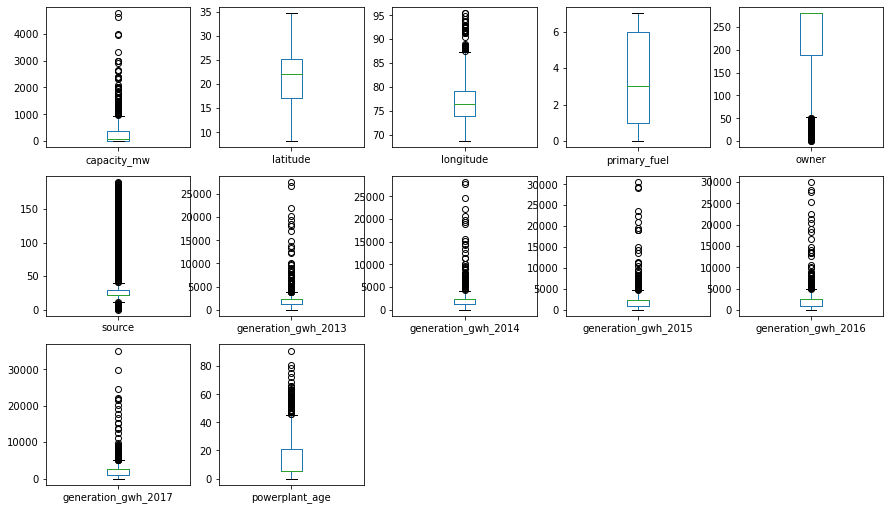

In [21]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

Z SCORE METHOD

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[5.49310543e-01, 1.11696511e+00, 7.92219230e-01, ...,
        1.58055100e-16, 0.00000000e+00, 4.84289622e-01],
       [3.84627594e-01, 5.58544334e-01, 5.15375049e-01, ...,
        1.58055100e-16, 0.00000000e+00, 6.15612596e-01],
       [4.86024006e-01, 9.08244482e-02, 1.57471932e+00, ...,
        1.58055100e-16, 0.00000000e+00, 6.15612596e-01],
       ...,
       [5.09648681e-01, 9.92161544e-01, 3.18692869e-01, ...,
        1.58055100e-16, 0.00000000e+00, 6.15612596e-01],
       [4.15667312e-01, 4.90522748e-01, 6.89639387e-01, ...,
        1.58055100e-16, 0.00000000e+00, 6.15612596e-01],
       [5.25168540e-01, 1.86492277e+00, 6.48586281e-02, ...,
        1.58055100e-16, 0.00000000e+00, 6.15612596e-01]])

In [23]:
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,powerplant_age
0,2.5,28.1839,73.2407,6,229,109,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7.0
1,98.0,24.7663,74.6090,1,258,174,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0
2,39.2,21.9038,69.3732,7,2,21,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0
3,135.0,23.8712,91.3602,2,280,22,631.777928,617.789264,843.747000,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,1,280,22,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,280,22,2304.059202,2420.393316,0.994875,233.596650,865.400000,2.0
904,3.0,12.8932,78.1654,6,114,77,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0
905,25.5,15.2758,75.5811,7,280,21,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0
906,80.0,24.3500,73.7477,1,91,59,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,5.0


In [24]:
df.shape

(908, 12)

In [25]:
840/908

0.9251101321585903

In [26]:
df_new.skew()

capacity_mw            1.969059
latitude              -0.186743
longitude              0.960308
primary_fuel           0.415671
owner                 -1.262500
source                 1.796064
generation_gwh_2013    1.539244
generation_gwh_2014    1.450193
generation_gwh_2015    1.333373
generation_gwh_2016    1.357090
generation_gwh_2017    1.252476
powerplant_age         1.564956
dtype: float64

In [27]:
df_new.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'owner',
       'source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'powerplant_age'],
      dtype='object')

In [28]:
list=['owner', 'source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'powerplant_age']
for i in list:
    vc=df_new[i].value_counts()
    print(vc)

280    514
234      4
5        4
108      4
73       3
      ... 
163      1
162      1
161      1
160      1
0        1
Name: owner, Length: 267, dtype: int64
22     468
21     124
84      10
109      8
110      5
      ... 
107      1
106      1
105      1
104      1
0        1
Name: source, Length: 178, dtype: int64
2304.059202    497
0.000000        21
1262.137600      1
5493.370000      1
2028.780000      1
              ... 
1514.240750      1
2998.446000      1
3683.910000      1
6397.000000      1
1730.000000      1
Name: generation_gwh_2013, Length: 324, dtype: int64
2420.393316    480
0.000000        28
483.043000       1
1542.270000      1
1045.695250      1
              ... 
392.219050       1
5187.079400      1
5371.950000      1
3036.541000      1
7744.000000      1
Name: generation_gwh_2014, Length: 334, dtype: int64
2414.072373    456
0.000000        28
240.799900       1
2924.000000      1
2441.210000      1
              ... 
152.195200       1
495.630000       1
194

In [29]:
df_new["powerplant_age"]=df_new["powerplant_age"].replace(0,1)

In [30]:
df_new["owner"]=df_new["owner"].replace(0,1)
df_new["source"]=df_new["source"].replace(0,1)

In [31]:
df_new["powerplant_age"]=df_new["powerplant_age"].replace(0,1)

In [32]:
df_new["generation_gwh_2013"]=df_new["generation_gwh_2013"].replace(0,1)
df_new["generation_gwh_2014"]=df_new["generation_gwh_2014"].replace(0,1)
df_new["generation_gwh_2015"]=df_new["generation_gwh_2015"].replace(0,1)
df_new["generation_gwh_2016"]=df_new["generation_gwh_2016"].replace(0,1)
df_new["generation_gwh_2017"]=df_new["generation_gwh_2017"].replace(0,1)

BOXCOX METHOD 

In [33]:
values=['longitude','owner', 'source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'powerplant_age']
from scipy.stats import boxcox
for i in values:
    df_new[i]=boxcox(df_new[i],0.5)
df_new.skew()

capacity_mw            1.969059
latitude              -0.186743
longitude              0.873306
primary_fuel           0.415671
owner                 -1.687123
source                 1.483255
generation_gwh_2013   -0.461440
generation_gwh_2014   -0.466866
generation_gwh_2015   -0.431475
generation_gwh_2016   -0.383127
generation_gwh_2017   -0.402882
powerplant_age         1.045241
dtype: float64

CORRELATION GRAPH

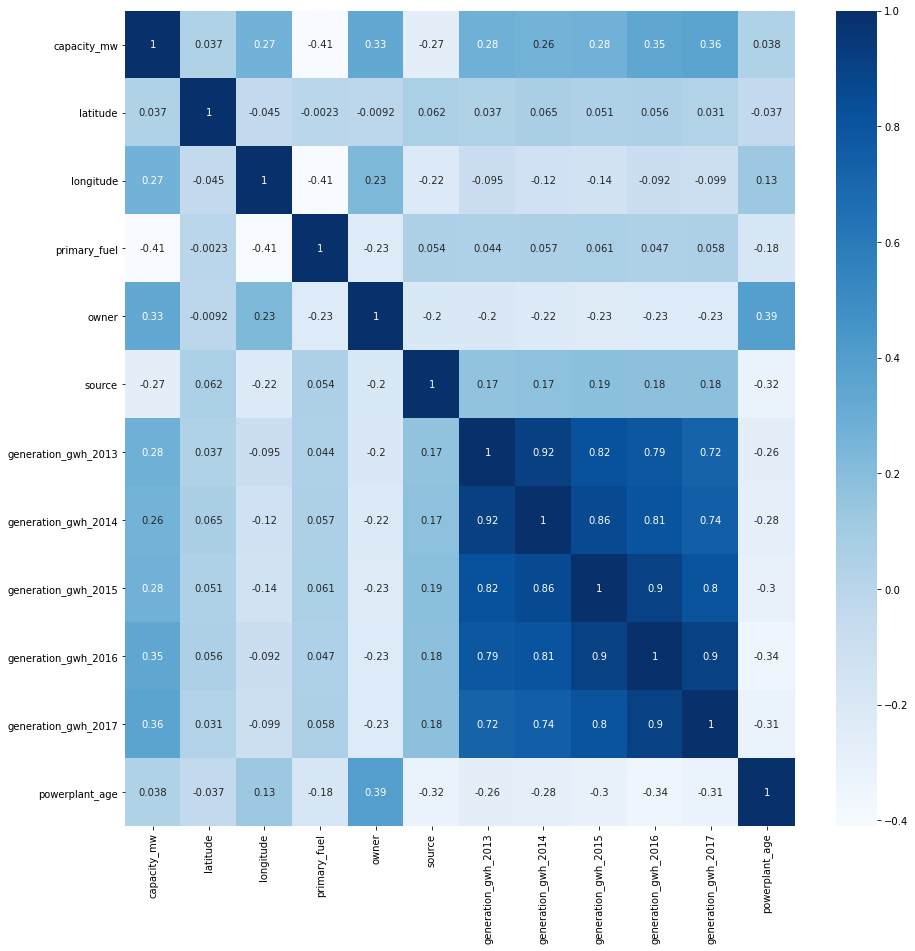

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,1:]
x

,latitude,longitude,primary_fuel,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,powerplant_age
0,28.1839,15.116156,6,28.265492,18.880613,94.001233,96.394986,96.266421,97.074443,98.633085,3.291503
1,24.7663,15.275300,1,30.124757,24.381812,94.001233,96.394986,96.266421,97.074443,98.633085,2.472136
2,21.9038,14.658115,7,0.828427,7.165151,94.001233,96.394986,96.266421,97.074443,98.633085,2.472136
3,23.8712,17.116506,2,31.466401,7.380832,48.270386,47.710734,56.094647,57.531653,49.527643,5.483315
4,21.9603,16.155892,1,31.466401,7.380832,79.689412,108.191651,151.835887,156.025314,144.773018,1.464102
...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,15.590543,1,31.466401,7.380832,94.001233,96.394986,-0.005132,28.567738,56.835364,0.828427
904,12.8932,15.682240,6,19.354157,15.549929,94.001233,96.394986,96.266421,97.074443,98.633085,2.472136
905,15.2758,15.387478,7,31.466401,7.165151,94.001233,96.394986,96.266421,97.074443,98.633085,2.472136
906,24.3500,15.175296,1,17.078784,13.362291,94.001233,96.394986,96.266421,97.074443,98.633085,2.472136


In [36]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [37]:
calc_vif(x)

,variable,VIF factor
0,latitude,12.857457
1,longitude,44.933896
2,primary_fuel,3.061521
3,owner,17.739233
4,source,5.067453
5,generation_gwh_2013,44.959142
6,generation_gwh_2014,51.371183
7,generation_gwh_2015,43.188737
8,generation_gwh_2016,60.383983
9,generation_gwh_2017,29.907876


STANDARD SCALER METHOD

In [38]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
x=scale.fit_transform(x)
x.shape

(840, 11)

In [39]:
y=df_new.iloc[:,0]
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 840, dtype: float64

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [40]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=DecisionTreeRegressor()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.7511421345548299 on random state 173


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=173)

In [42]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 0.1275156824687207
training score= 0.506060427124629
error= 276.886473887982 

testing score= 0.7307114359881948
training score= 0.9999657953841204
error= 231.00749386652603 

testing score= -351.4805773544505
training score= -0.18790141722044518
error= 448.2454472243968 

testing score= 0.7877664855511994
training score= 0.9646012288411028
error= 180.34239080131672 

testing score= 0.6522966718145355
training score= 0.8026922453958981
error= 217.20246226355079 



CROSS VALIDATION PROCESS

In [43]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.42695791 0.47922071 0.44606396 0.56739227 0.47696524]
mean_score= 0.47932001774461186
std= 0.04818720251384037 

score= [0.55974672 0.43648847 0.58162786 0.63925303 0.72517277]
mean_score= 0.5884577674979856
std= 0.09511759995858812 

score= [-0.15531747 -0.17849646 -0.15446713 -0.21974877 -0.1731368 ]
mean_score= -0.17623332400318156
std= 0.023746767848613206 

score= [0.80911896 0.83739785 0.6627226  0.75720838 0.82160847]
mean_score= 0.7776112515627824
std= 0.06343280991223782 

score= [0.74387295 0.68139463 0.59133279 0.74475895 0.78399066]
mean_score= 0.7090699962119057
std= 0.06741813936901239 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameters={"criterion":["squared_error","absolute_error","poisson"],"warm_start":[True,False],"max_depth": np.arange(2,10), "max_features": ["auto","sqrt","log2"]}

In [46]:
gcv=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [47]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [48]:
gcv.best_params_

{'criterion': 'poisson',
 'max_depth': 9,
 'max_features': 'sqrt',
 'warm_start': True}

In [49]:
final_model=RandomForestRegressor(criterion="poisson",max_depth=9,max_features="sqrt",warm_start=True)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

0.19987792577984786
score= 0.6405712318769987
253.97750087675817


SAVING THE BEST MODEL

In [50]:
import joblib

joblib.dump(final_model,"global_pp_capacity_mw.obj")

['global_pp_capacity_mw.obj']

In [51]:
globalppcapacity_from_joblib=joblib.load("global_pp_capacity_mw.obj")
globalppcapacity_from_joblib.predict(x_test)

array([ 196.11358056,  170.379286  ,  270.27842778,  344.67835071,
        172.29137367,  169.80535622,  720.11979995,  344.13760549,
        169.80535622,  170.8058207 ,  287.91542778,  169.80535622,
        189.05556656,  224.6506113 ,  189.05556656,  169.80535622,
        189.05556656,  295.47547684,  171.54344488,  171.54344488,
        169.80535622,  445.02526256,  340.12480826,  171.41360408,
        204.59967506,  169.80535622,  189.05556656,  169.80535622,
        169.80535622,  189.05556656,  171.68359239,  171.54344488,
        378.76083513, 1184.57057868,  171.54344488,  909.90701886,
        233.86098861,  738.92894174,  169.80535622,  379.02059866,
        171.54344488,  189.05556656,  169.80535622,  578.21988098,
        169.80535622,  171.41360408,  189.05556656,  189.05556656,
        169.80535622,  189.05556656,  169.80535622,  229.15491046,
        189.05556656,  343.10368027,  189.05556656, 1325.1644884 ,
        171.8393273 ,  228.52491584,  169.80535622,  169.80535

CLASSIFICATION MODEL - TO PREDICT THE PRIMARY FUEL

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore") 

In [53]:
df_new

,capacity_mw,latitude,longitude,primary_fuel,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,powerplant_age
0,2.5,28.1839,15.116156,6,28.265492,18.880613,94.001233,96.394986,96.266421,97.074443,98.633085,3.291503
1,98.0,24.7663,15.275300,1,30.124757,24.381812,94.001233,96.394986,96.266421,97.074443,98.633085,2.472136
2,39.2,21.9038,14.658115,7,0.828427,7.165151,94.001233,96.394986,96.266421,97.074443,98.633085,2.472136
3,135.0,23.8712,17.116506,2,31.466401,7.380832,48.270386,47.710734,56.094647,57.531653,49.527643,5.483315
4,1800.0,21.9603,16.155892,1,31.466401,7.380832,79.689412,108.191651,151.835887,156.025314,144.773018,1.464102
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,15.590543,1,31.466401,7.380832,94.001233,96.394986,-0.005132,28.567738,56.835364,0.828427
904,3.0,12.8932,15.682240,6,19.354157,15.549929,94.001233,96.394986,96.266421,97.074443,98.633085,2.472136
905,25.5,15.2758,15.387478,7,31.466401,7.165151,94.001233,96.394986,96.266421,97.074443,98.633085,2.472136
906,80.0,24.3500,15.175296,1,17.078784,13.362291,94.001233,96.394986,96.266421,97.074443,98.633085,2.472136


In [54]:
df_new.skew()

capacity_mw            1.969059
latitude              -0.186743
longitude              0.873306
primary_fuel           0.415671
owner                 -1.687123
source                 1.483255
generation_gwh_2013   -0.461440
generation_gwh_2014   -0.466866
generation_gwh_2015   -0.431475
generation_gwh_2016   -0.383127
generation_gwh_2017   -0.402882
powerplant_age         1.045241
dtype: float64

In [56]:
skew=("capacity_mw","longitude","owner","source","powerplant_age")
for col in skew:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [57]:
df_new.skew()

capacity_mw            0.055515
latitude              -0.186743
longitude              0.782659
primary_fuel           0.415671
owner                 -1.687123
source                 0.320932
generation_gwh_2013   -0.461440
generation_gwh_2014   -0.466866
generation_gwh_2015   -0.431475
generation_gwh_2016   -0.383127
generation_gwh_2017   -0.402882
powerplant_age         0.137687
dtype: float64

In [58]:
df_new.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'owner',
       'source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'powerplant_age'],
      dtype='object')

CORRELATION GRAPH

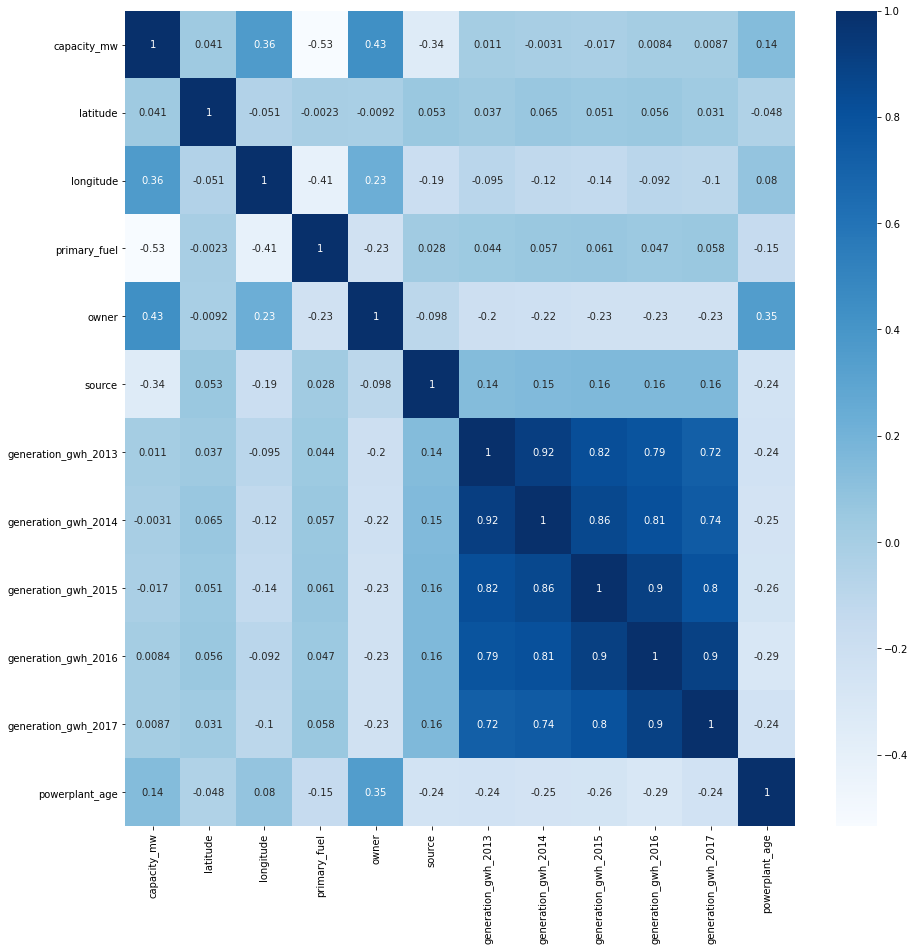

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,df_new.columns != 'primary_fuel']
x

,capacity_mw,latitude,longitude,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,powerplant_age
0,1.252763,28.1839,2.779822,28.265492,2.989745,94.001233,96.394986,96.266421,97.074443,98.633085,1.456637
1,4.595120,24.7663,2.789649,30.124757,3.234033,94.001233,96.394986,96.266421,97.074443,98.633085,1.244770
2,3.693867,21.9038,2.750989,0.828427,2.099875,94.001233,96.394986,96.266421,97.074443,98.633085,1.244770
3,4.912655,23.8712,2.896823,31.466401,2.125947,48.270386,47.710734,56.094647,57.531653,49.527643,1.869232
4,7.496097,21.9603,2.842342,31.466401,2.125947,79.689412,108.191651,151.835887,156.025314,144.773018,0.901827
...,...,...,...,...,...,...,...,...,...,...,...
903,7.378384,16.2949,2.808833,31.466401,2.125947,94.001233,96.394986,-0.005132,28.567738,56.835364,0.603456
904,1.386294,12.8932,2.814345,19.354157,2.806382,94.001233,96.394986,96.266421,97.074443,98.633085,1.244770
905,3.277145,15.2758,2.796518,31.466401,2.099875,94.001233,96.394986,96.266421,97.074443,98.633085,1.244770
906,4.394449,24.3500,2.783485,17.078784,2.664606,94.001233,96.394986,96.266421,97.074443,98.633085,1.244770


In [61]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [62]:
calc_vif(x)

,variable,VIF factor
0,capacity_mw,9.436100
1,latitude,13.036646
2,longitude,85.131681
3,owner,20.651113
4,source,38.723819
5,generation_gwh_2013,44.942066
6,generation_gwh_2014,51.355322
7,generation_gwh_2015,43.296446
8,generation_gwh_2016,60.743841
9,generation_gwh_2017,30.238887


In [63]:
df_new.drop("longitude",axis=1,inplace=True)

In [64]:
x=df_new.iloc[:,df_new.columns != 'primary_fuel']
x

,capacity_mw,latitude,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,powerplant_age
0,1.252763,28.1839,28.265492,2.989745,94.001233,96.394986,96.266421,97.074443,98.633085,1.456637
1,4.595120,24.7663,30.124757,3.234033,94.001233,96.394986,96.266421,97.074443,98.633085,1.244770
2,3.693867,21.9038,0.828427,2.099875,94.001233,96.394986,96.266421,97.074443,98.633085,1.244770
3,4.912655,23.8712,31.466401,2.125947,48.270386,47.710734,56.094647,57.531653,49.527643,1.869232
4,7.496097,21.9603,31.466401,2.125947,79.689412,108.191651,151.835887,156.025314,144.773018,0.901827
...,...,...,...,...,...,...,...,...,...,...
903,7.378384,16.2949,31.466401,2.125947,94.001233,96.394986,-0.005132,28.567738,56.835364,0.603456
904,1.386294,12.8932,19.354157,2.806382,94.001233,96.394986,96.266421,97.074443,98.633085,1.244770
905,3.277145,15.2758,31.466401,2.099875,94.001233,96.394986,96.266421,97.074443,98.633085,1.244770
906,4.394449,24.3500,17.078784,2.664606,94.001233,96.394986,96.266421,97.074443,98.633085,1.244770


In [65]:
calc_vif(x)

,variable,VIF factor
0,capacity_mw,8.570980
1,latitude,11.703305
2,owner,19.876314
3,source,19.829923
4,generation_gwh_2013,44.629598
5,generation_gwh_2014,51.354255
6,generation_gwh_2015,43.294682
7,generation_gwh_2016,60.680948
8,generation_gwh_2017,30.236905
9,powerplant_age,9.582093


In [66]:
df_new["primary_fuel"].value_counts()

1    233
3    224
7    123
6    121
2     64
0     45
5     21
4      9
Name: primary_fuel, dtype: int64

SMOTE PROCESS -as our target column is imbalanced

In [67]:
dfx=df.iloc[:,df.columns != 'primary_fuel']
dfx

,capacity_mw,latitude,longitude,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,powerplant_age
0,1.252763,28.1839,4.307313,229,4.700480,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,2.079442
1,4.595120,24.7663,4.325575,258,5.164786,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.791759
2,3.693867,21.9038,4.253813,2,3.091042,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.791759
3,4.912655,23.8712,4.525696,280,3.135494,631.777928,617.789264,843.747000,886.004428,663.774500,2.708050
4,7.496097,21.9603,4.423757,280,3.135494,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1.386294
...,...,...,...,...,...,...,...,...,...,...,...
903,7.378384,16.2949,4.361273,280,3.135494,2304.059202,2420.393316,0.994875,233.596650,865.400000,1.098612
904,1.386294,12.8932,4.371539,114,4.356709,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.791759
905,3.277145,15.2758,4.338350,280,3.091042,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.791759
906,4.394449,24.3500,4.314118,91,4.094345,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.791759


In [68]:
dfy=df.iloc[:,3]
dfy

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 908, dtype: int32

In [69]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [70]:
trainx.value_counts()

capacity_mw  latitude   longitude  owner  source    generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  powerplant_age
8.468213     24.098300  4.426903   280    3.135494  26761.390000         27594.000000         29047.000000         30015.000000         35116.000000         2.833213          1
3.258097     24.717600  4.343184   140    4.543295  2304.059202          2420.393316          2414.072373          2453.936292          2531.754458          1.791759          1
3.236066     16.697334  4.355220   40     3.406355  2304.059202          2420.393316          2414.072373          2453.936292          2531.754458          1.791759          1
3.237839     17.429717  4.364600   172    4.787431  2304.059202          2420.393316          2414.072373          2453.936292          2531.754458          1.791759          1
3.237910     19.073973  4.304557   166    4.755042  2304.059202          2420.393316          2414.072373          2453.

In [71]:
trainy.value_counts()

7    259
5    259
3    259
1    259
6    259
4    259
2    259
0    259
Name: primary_fuel, dtype: int64

STANDARD SCALER

In [72]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
trainx=scale.fit_transform(trainx)

In [73]:
trainx

array([[-1.72776885,  1.43638425, -0.76004042, ...,  0.04606342,
         0.01697583, -0.31606924],
       [ 0.17498387,  0.83710142, -0.40504746, ...,  0.04606342,
         0.01697583, -0.70348868],
       [-0.33808561,  0.33515646, -1.79997512, ...,  0.04606342,
         0.01697583, -0.70348868],
       ...,
       [-0.71444739, -0.43317671, -0.58709969, ...,  0.04606342,
         0.01697583, -0.70348868],
       [-0.05296363,  0.42315849, -1.59325733, ...,  0.04606342,
         0.01697583, -0.70348868],
       [-1.77645554, -0.47506669, -0.44117501, ...,  0.04606342,
         0.01697583, -0.70348868]])

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [74]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=i) 
    m=DecisionTreeClassifier()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=accuracy_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.8938906752411575 on random state 126


In [75]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=126)

In [76]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",accuracy_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    print(confusion_matrix(pred_test,y_test))
    print(classification_report(pred_test,y_test),"\n")

testing score= 0.7170418006430869
training score= 0.7096551724137931
[[72  5  3  0  0 15  8  0]
 [ 0 41  6  5  3  3  2  3]
 [ 0 12 35 12  0  3  0  0]
 [ 0  5 11 42  5  7  0  0]
 [ 0  8  2  5 74  0  0  0]
 [ 0  1 11  8  0 54  2  0]
 [ 5  4  0  0  0  0 55  2]
 [ 4  6  1  0  0  1  8 73]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       103
           1       0.50      0.65      0.57        63
           2       0.51      0.56      0.53        62
           3       0.58      0.60      0.59        70
           4       0.90      0.83      0.87        89
           5       0.65      0.71      0.68        76
           6       0.73      0.83      0.78        66
           7       0.94      0.78      0.85        93

    accuracy                           0.72       622
   macro avg       0.71      0.71      0.71       622
weighted avg       0.74      0.72      0.72       622
 

testing score= 0.8890675241157556
training score= 1.0
[[78  3

CROSS VALIDATION PROCESS

In [77]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    score=cross_val_score(i,trainx,trainy,cv=10) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.66826923 0.66826923 0.70048309 0.73429952 0.72463768 0.72463768
 0.69565217 0.66183575 0.73429952 0.71980676]
mean_score= 0.7032190635451505
std= 0.027101584876919462 

score= [0.79326923 0.84615385 0.86956522 0.85024155 0.85507246 0.8647343
 0.88405797 0.90338164 0.89855072 0.90821256]
mean_score= 0.867323950204385
std= 0.032577732139465396 

score= [0.77884615 0.80769231 0.79710145 0.82608696 0.84541063 0.84541063
 0.81642512 0.85507246 0.83574879 0.84541063]
mean_score= 0.8253205128205128
std= 0.023561443980988694 

score= [0.84134615 0.91346154 0.89371981 0.91304348 0.93719807 0.89855072
 0.9178744  0.93236715 0.9178744  0.92270531]
mean_score= 0.9088141025641026
std= 0.025772318823450612 

score= [0.84615385 0.83173077 0.83574879 0.84057971 0.8647343  0.82125604
 0.82125604 0.85024155 0.86956522 0.82608696]
mean_score= 0.8407353214418432
std= 0.016143957762181596 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameter={"bootstrap": [True,False],
          "criterion": ["gini","entropy"],
          "warm_start": [True,False],
          "max_features": ["auto","sqrt","log2"]}

In [80]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [81]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [82]:
gcv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_features': 'log2',
 'warm_start': True}

In [83]:
final_model=RandomForestClassifier(bootstrap=False,criterion="entropy",max_features='log2',warm_start=True)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(pred,y_test))

0.9131832797427653


AUC-ROC CURVE

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [85]:
y_pred_prob=final_model.predict_proba(x_test)
y_pred_prob

array([[0.  , 0.02, 0.  , ..., 0.  , 0.96, 0.02],
       [0.  , 0.01, 0.  , ..., 0.99, 0.  , 0.  ],
       [0.  , 0.04, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.07, ..., 0.93, 0.  , 0.  ],
       [0.  , 0.2 , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.04, 0.94, ..., 0.  , 0.  , 0.  ]])

In [86]:
roc_auc_score(y_test,y_pred_prob, multi_class='ovo', average='weighted')

0.9926737473738887

Text(0.5, 1.0, 'RandomForestClassifier')

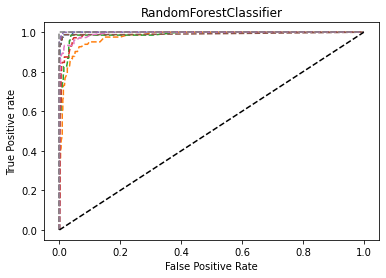

In [87]:
fpr = {}
tpr = {}
thresh ={}

n_class =8

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    plt.plot(fpr[i], tpr[i], linestyle='--')

plt.plot([0,1],[0,1],"k--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title("RandomForestClassifier")

SAVING THE BEST MODEL

In [88]:
import joblib

joblib.dump(final_model,"global_pp_primaryfuel.obj")

['global_pp_primaryfuel.obj']

In [89]:
globalpp_primaryfuel_from_joblib=joblib.load("global_pp_primaryfuel.obj")
globalpp_primaryfuel_from_joblib.predict(x_test)

array([6, 5, 4, 4, 3, 1, 5, 5, 3, 1, 4, 7, 5, 6, 2, 7, 0, 7, 2, 3, 0, 3,
       0, 2, 1, 7, 2, 2, 0, 6, 4, 5, 0, 4, 4, 0, 4, 0, 0, 2, 2, 7, 1, 5,
       4, 4, 5, 0, 6, 6, 0, 6, 1, 2, 1, 1, 7, 4, 4, 3, 6, 7, 5, 5, 3, 6,
       5, 1, 6, 0, 0, 7, 7, 7, 6, 2, 4, 4, 7, 5, 1, 4, 5, 0, 6, 4, 5, 3,
       4, 0, 6, 1, 4, 4, 4, 1, 0, 0, 5, 2, 4, 0, 2, 3, 0, 6, 3, 2, 2, 7,
       7, 0, 7, 4, 5, 6, 0, 4, 5, 2, 0, 5, 3, 7, 2, 2, 2, 6, 0, 1, 3, 3,
       6, 1, 4, 5, 6, 6, 5, 2, 2, 2, 4, 4, 7, 7, 7, 4, 2, 6, 4, 3, 1, 3,
       0, 7, 5, 0, 3, 5, 6, 7, 2, 1, 7, 5, 5, 5, 0, 2, 7, 7, 0, 7, 7, 1,
       2, 6, 6, 7, 7, 5, 3, 5, 1, 0, 5, 5, 0, 2, 7, 5, 5, 5, 0, 6, 2, 6,
       0, 2, 1, 4, 4, 2, 5, 3, 5, 4, 7, 1, 3, 5, 5, 1, 0, 7, 5, 2, 6, 6,
       2, 4, 6, 5, 4, 4, 1, 4, 4, 7, 0, 6, 3, 4, 5, 4, 7, 4, 1, 7, 0, 1,
       2, 1, 0, 5, 0, 5, 5, 3, 5, 3, 2, 4, 0, 0, 0, 6, 3, 0, 5, 0, 7, 6,
       3, 1, 3, 3, 3, 0, 6, 1, 0, 1, 4, 1, 1, 6, 0, 2, 1, 3, 2, 3, 0, 3,
       7, 4, 0, 5, 4, 4, 6, 0, 5, 1, 4, 3, 0, 0, 6,